In [1]:
## Import packages

import sys
import os
import numpy as np
#import h5py
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns
import networkx as nx


In [2]:
print(os.getcwd())

/home/jovyan/lecture_5_02_04_2020


In [3]:
print(os.listdir())

['Lecture5_02_04_2020_code_and_data.zip', 'adjacency_heatmap.pdf', 'Lecture5_02_04_2020_final.ipynb', 'brain_net.pdf', '.ipynb_checkpoints', 'Lecture5_working.ipynb', 'data']


In [4]:
np.mean?

In [200]:
# Load in one brain
example_number = 4    # Pick any number from 0-23

# Load in one scan as brain_example. 
brain_example = sio.loadmat(f'data/brain_{example_number}.mat')

brain_example = brain_example['adj']

np.fill_diagonal(brain_example,0)
brain_example = 0.5*(brain_example + np.transpose(brain_example))
brain_example[brain_example < 2000] = 0
brain_example[brain_example > 0] = 1

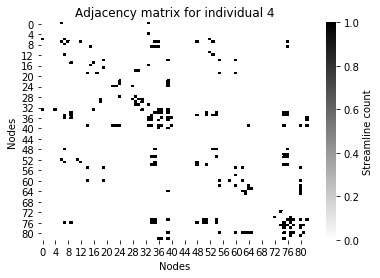

In [201]:

# # With matplotlib
# plt.pcolor(brain_example)
# plt.xlabel('Nodes')
# plt.ylabel('Nodes')
# plt.title(f'Adjacency matrix for individual {example_number}')
# plt.colorbar(label = 'Streamline count')

# With seaborn
#cmap = sns.palplot(sns.cubehelix_palette(8))
fig_0 = sns.heatmap(brain_example,
                    cbar_kws={'label': 'Streamline count'},
                    cmap = "gray_r")
fig_0.set(xlabel = 'Nodes', ylabel = 'Nodes', title = f'Adjacency matrix for individual {example_number}');
plt.savefig('adjacency_heatmap.pdf')

In [202]:
brain_example.shape

(83, 83)

In [203]:
brain_example[2, 7]

0.0

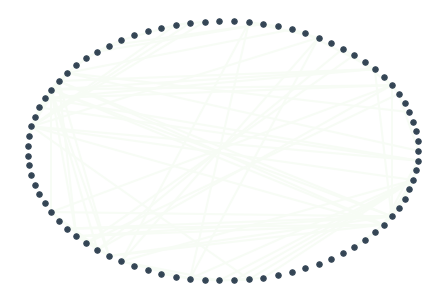

In [204]:
G_example = nx.from_numpy_array(brain_example, parallel_edges = False)
pos = nx.circular_layout(G_example)

#colors = [np.sqrt(d['weight']) for u,v,d in G_example.edges(data = True)]
colors = [d['weight'] for u,v,d in G_example.edges(data = True)]



nx.draw(G_example, pos, node_color='#344555', edge_color=colors, node_size = 30,
        width=2, edge_cmap=plt.cm.Greens, with_labels=False)
plt.show()

In [205]:
coordinates_mat = sio.loadmat('data/LP_coordinates.mat')
x_coord = coordinates_mat['X']
y_coord = coordinates_mat['Y']
z_coord = coordinates_mat['Z']

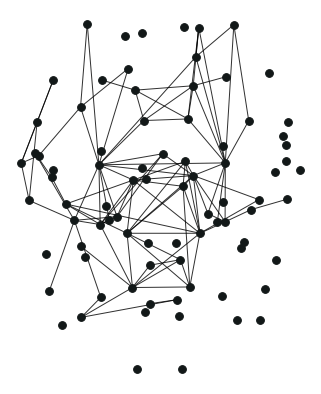

In [206]:

# Need to assign node locations
for node in G_example.nodes():
    G_example.nodes[node]['pos'] = [x_coord[node][0], y_coord[node][0]]
    

plt.figure(figsize = (5.5,7))
pos = nx.get_node_attributes(G_example,'pos')
nx.draw_networkx_edges(G_example,pos,alpha=0.8,edge_color=colors,edge_cmap=plt.cm.gray, width = 1)
# Play with different colormaps (https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). Which is the most helpful?
nx.draw_networkx_nodes(G_example,pos, node_size = 60, node_color = '#121818')
plt.axis('off')

plt.savefig('brain_net.pdf')

In [192]:

edge_weights = brain_example.flatten()

In [56]:
# What is the average edge weight?
mean_edge_weight = edge_weights.mean()
print(f'The mean edge weight is {mean_edge_weight}.')

median_edge_weight = np.median(edge_weights)
print(f'The median edge weight is {median_edge_weight}.')


The mean edge weight is 260.95021048047613.
The median edge weight is 2.0.


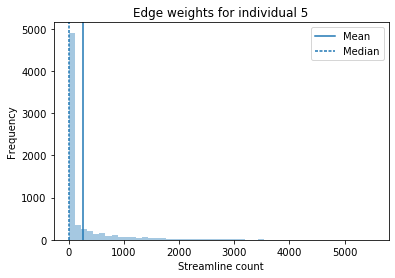

In [58]:

# # With matplotlib
# plt.hist(edge_weights)
# plt.axvline(mean_edge_weight, label = 'Mean', color = 'k')
# plt.axvline(median_edge_weight, label = 'Median', dashes = (2,1,2,1), color = 'k')
# plt.xlabel('Streamline count')
# plt.ylabel('Frequency')
# plt.legend()
# plt.title(f'Edge weights for individual {example_number}');


fig_1 = sns.distplot(edge_weights, kde = False)
fig_1.set(xlabel = 'Streamline count', ylabel = 'Frequency', title = f'Edge weights for individual {example_number}');
fig_1.axvline(mean_edge_weight, label = 'Mean')
fig_1.axvline(median_edge_weight, label = 'Median', dashes = (2,1,2,1))
fig_1.legend();

In [59]:
edge_weights_pos = edge_weights[edge_weights > 0].copy()


In [61]:
edge_weights_pos.shape

(3854,)

The mean edge weight is 466.4468085106383.
The median edge weight is 119.0.


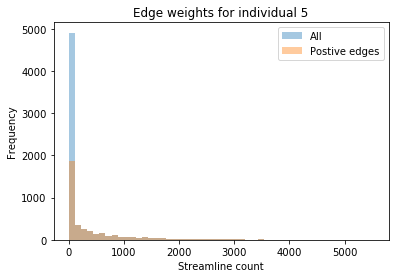

In [63]:

mean_edge_weight_pos = edge_weights_pos.mean()
print(f'The mean edge weight is {mean_edge_weight_pos}.')

median_edge_weight_pos = np.median(edge_weights_pos)
print(f'The median edge weight is {median_edge_weight_pos}.')


fig_2 = sns.distplot(edge_weights, kde = False, label = 'All')
sns.distplot(edge_weights_pos, kde = False, label = 'Postive edges')
fig_2.legend()
fig_2.set(xlabel = 'Streamline count', ylabel = 'Frequency', title = f'Edge weights for individual {example_number}');



In [67]:
edge_weights_pos.shape

(3854,)

In [66]:
print(len(np.unique(edge_weights_pos)))


840


In [70]:
# Sort and remove duplicates
sorted_edge_weights_pos = np.sort(edge_weights_pos)
#sum(edge_weights_pos==7)

# Slice notation a[start_index:end_index:step]
edge_weights_unique = sorted_edge_weights_pos[::2]
print(len(edge_weights_unique))
edge_weights_unique.shape

1927


(1927,)

In [80]:
# Now we can finally sample!

n = 10
sample_1 = np.random.choice(edge_weights_unique, n, replace = False)
print(sample_1.mean())

495.7


In [81]:

n_replicates = 100

sample_mean_vec = np.zeros((n_replicates, 1))

for rep in range(n_replicates):
    
    # Sample randomly n points from the population
    sample_i = np.random.choice(edge_weights_unique, n, replace = False)
    
    # Compute the mean of the sample
    sample_i_mean = np.mean(sample_i)
    
    # Store the mean
    sample_mean_vec[rep, 0] = sample_i_mean

print("done with experiment")

done with experiment


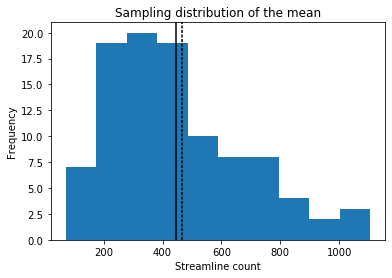

In [84]:
plt.hist(sample_mean_vec, label = 'Sample means')
plt.axvline(sample_mean_vec.mean(), label = 'Mean of sample means', color = 'k')
plt.axvline(edge_weights_unique.mean(), label = 'True mean', dashes = (2,1,2,1), color = 'k')
plt.xlabel('Streamline count')
plt.ylabel('Frequency')
plt.title('Sampling distribution of the mean')
plt.show()


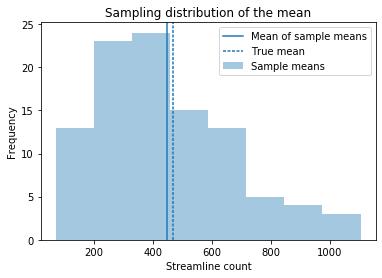

In [86]:
fig_3 = sns.distplot(sample_mean_vec, label = 'Sample means', kde = False)
fig_3.axvline(sample_mean_vec.mean(), label = 'Mean of sample means')
fig_3.axvline(edge_weights_unique.mean(), label = 'True mean', dashes = (2,1,2,1))
fig_3.legend()
fig_3.set(xlabel = 'Streamline count', ylabel = 'Frequency', title = 'Sampling distribution of the mean');


In [90]:
n = 30

sample_1 = np.random.choice(edge_weights_unique, n, replace = False)
print(f'The sample mean is {sample_1.mean()}')
print(f'The true mean is {edge_weights_unique.mean()}')

# We learned about the standard deviation eariler.
sample_1_stdev = np.std(sample_1, ddof = 1)
print(f'The standard deviaiton of our sample is {sample_1_stdev}')

sample_1_sem_calc = sample_1_stdev/np.sqrt(n)
print(f'The standard error of the mean via calculation is {sample_1_sem_calc}')

sample_1_sem_fn = stats.sem(sample_1, ddof = 1)   # Default is ddof = 1!!!
print(f'The standard error of the mean via stats.sem is {sample_1_sem_fn}')



The sample mean is 703.7666666666667
The true mean is 466.4468085106383
The standard deviaiton of our sample is 905.3746674751549
The standard error of the mean via calculation is 165.2980427899604
The standard error of the mean via stats.sem is 165.2980427899604
